### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [102]:
# set up notebook to display multiple output in one cell

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

print('The notebook is set up to display multiple output in one cell.')

The notebook is set up to display multiple output in one cell.


In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [104]:
# Set Pandas display options ("None" parameter shows all) '''

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

### Problems

Use the prompts below to get started with your data analysis. 

<div class="alert alert-block alert-success">

<b>1. Read in the `coupons.csv` file.</b>

</div>

In [105]:
data = pd.read_csv('coupons.csv')

In [106]:
data.head(3)
data.shape

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1


(12684, 26)

<div class="alert alert-block alert-success">

<b>2. Investigate the dataset for missing or problematic data.</b>

</div>

### Rename columns

In [107]:
data.rename(columns={'passanger': 'passenger'}, inplace=True)
data.head(3)

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1


### Check the dataset for duplicates

In [108]:
# Check for duplicates
duplicates = data[data.duplicated()]
duplicates.shape

# Remove duplicates, keeping the first occurrence
data.drop_duplicates(inplace=True)
data.shape

(74, 26)

(12610, 26)

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12610 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12610 non-null  object
 1   passenger             12610 non-null  object
 2   weather               12610 non-null  object
 3   temperature           12610 non-null  int64 
 4   time                  12610 non-null  object
 5   coupon                12610 non-null  object
 6   expiration            12610 non-null  object
 7   gender                12610 non-null  object
 8   age                   12610 non-null  object
 9   maritalStatus         12610 non-null  object
 10  has_children          12610 non-null  int64 
 11  education             12610 non-null  object
 12  occupation            12610 non-null  object
 13  income                12610 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12503 non-null  obj

### Check the dataset for outliers

In [110]:
fig = px.box(data, x="temperature")
fig.show()

#### Obervations:

- There are no outliers to deal with.

### Handle Missing Values

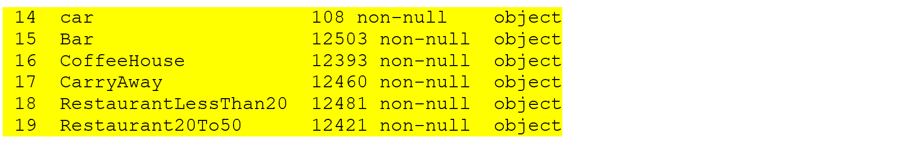

In [111]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [112]:
import missingno as msno

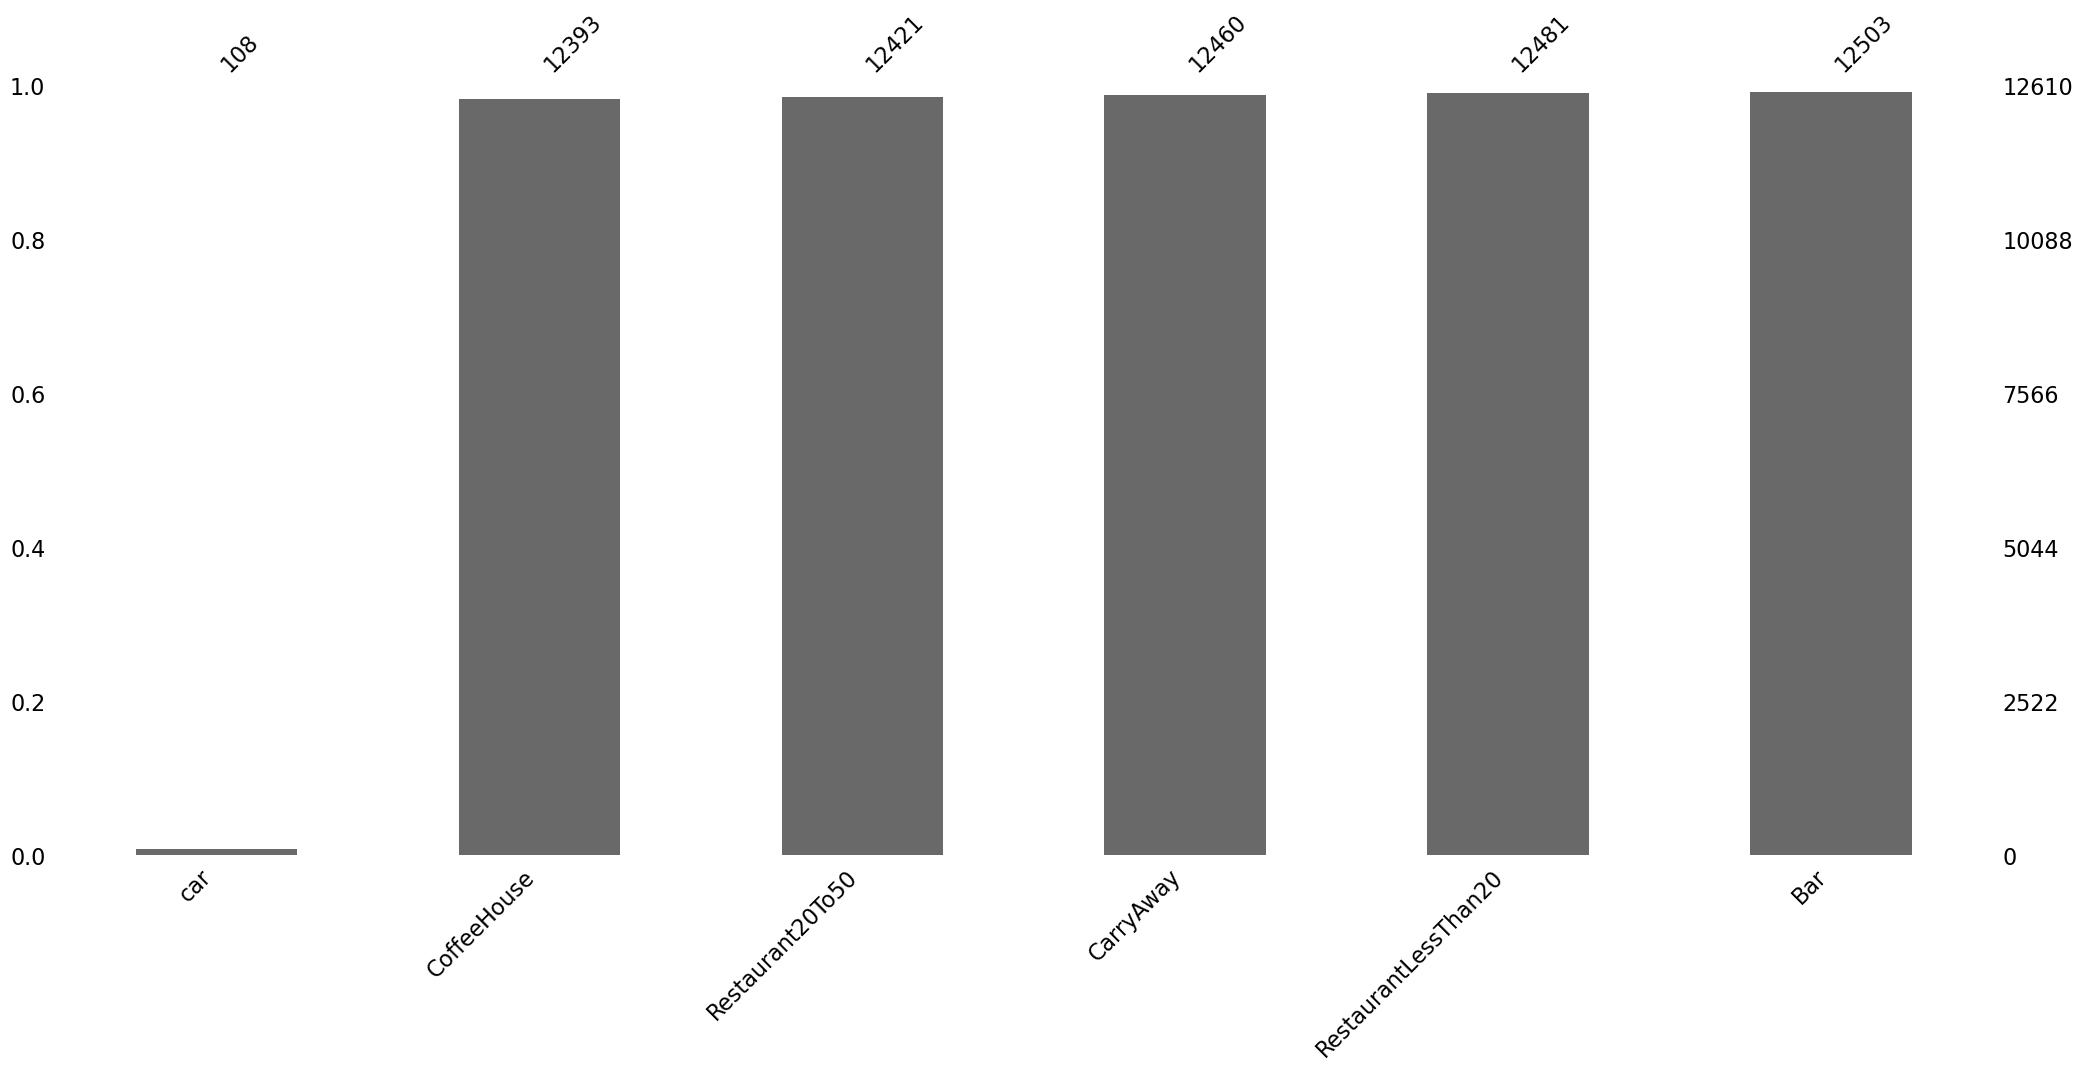

In [12]:
# Calculating the percentage of missing values for each column
missing_data = data.isnull().sum()
missing_percentage = (missing_data / len(data)) * 100
 
# Combining the counts and percentages into a DataFrame for better visualization
missing_info = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})
 
# Sort the DataFrame columns by the percentage of missing values
sorted_df = data[missing_info.sort_values(by='Percentage', ascending=False).index]
 
# Select the top 15 columns with the most missing values
top_6_missing = sorted_df.iloc[:, :6]
 
#Visual with missingno
msno.bar(top_6_missing)
plt.show();

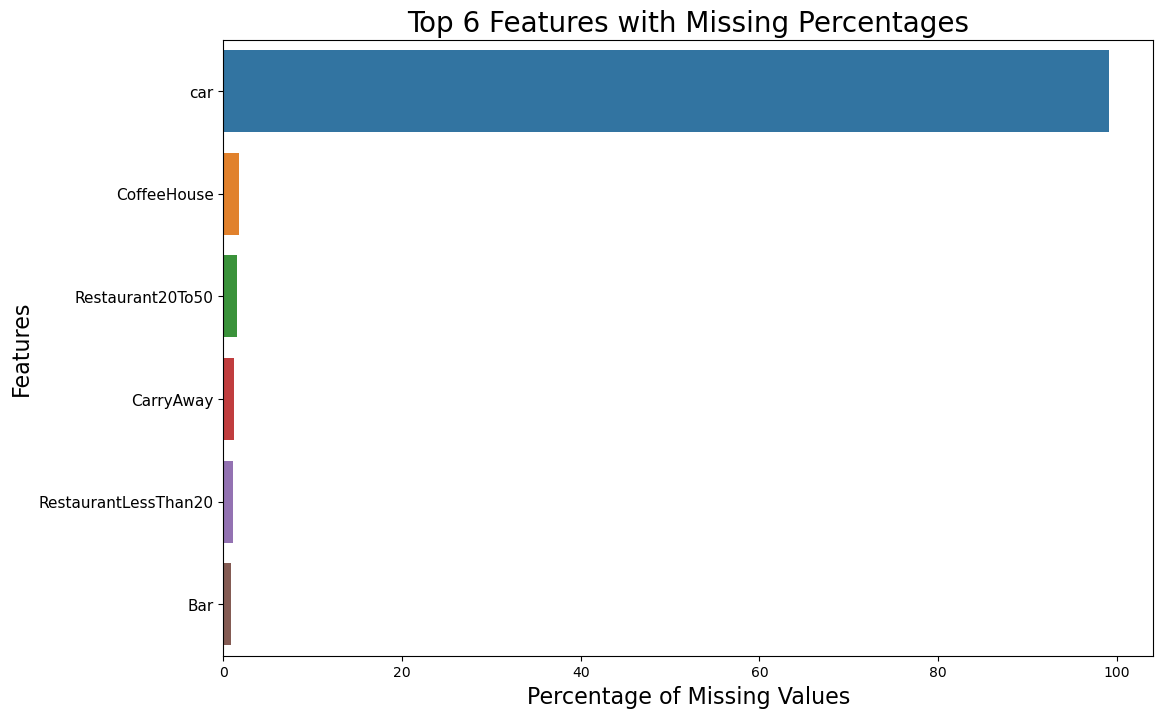

In [113]:
# Filter to show only the top 6 columns with the most missing values
top_6_missing_info = missing_info.nlargest(6, 'Percentage')
 
# Create the horizontal bar plot using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Percentage', y=top_6_missing_info.index, data=top_6_missing_info, orient='h')
plt.title('Top 6 Features with Missing Percentages', fontsize=20)
plt.xlabel('Percentage of Missing Values', fontsize=16)
plt.ylabel('Features', fontsize=16)
plt.yticks(fontsize=11)
plt.show();

<div class="alert alert-block alert-success">

<b>3. Decide what to do about your missing data -- drop, replace, other...</b>

</div>

<div class="alert alert-block alert-info">
<b><center>Strategy to Deal with Missing Values</center></b><br>
    
1. Drop the **car** column
2. Drop all of the rows that have missing values in each of the following columns:<br>
a. Bar                   
b. CoffeeHouse            
c. CarryAway              
d. RestaurantLessThan20  
e. Restaurant20To50<br>    
3. Perform a **Random Sample Imputation** to replace the remaining missing values.
</div>

#### Drop the `car` column

In [114]:
data['car'].value_counts()

car
Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: count, dtype: int64

In [115]:
bool_series_car = pd.isnull(data['car'])
missing_values_count_car = bool_series_car.sum()
filtered_car = data[bool_series_car]
print("Count of missing values in the 'car' column:", missing_values_count_car)

Count of missing values in the 'car' column: 12502


In [116]:
data = data.drop(['car'], axis=1)

In [117]:
data.columns

Index(['destination', 'passenger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')

In [118]:
data.shape

(12610, 25)

#### Drop all of the rows that have missing values in each of the following columns ...

`Bar`, `CoffeeHouse`, `CarryAway`, `RestaurantLessThan20`, and `Restaurant20To50`

In [119]:
def nulls(column, name):
    bool_series = pd.isnull(column)
    missing_values_count = bool_series.sum()
    print(f"Count of missing values in the '{name}' column:", missing_values_count)
    print('\n', column.value_counts(), '\n')

In [120]:
nulls(data['Bar'], 'Bar')
nulls(data['CoffeeHouse'], 'CoffeeHouse')
nulls(data['CarryAway'], 'CarryAway')
nulls(data['RestaurantLessThan20'], 'RestaurantLessThan20')
nulls(data['Restaurant20To50'], 'Restaurant20To50')

Count of missing values in the 'Bar' column: 107

 Bar
never    5178
less1    3438
1~3      2468
4~8      1071
gt8       348
Name: count, dtype: int64 

Count of missing values in the 'CoffeeHouse' column: 217

 CoffeeHouse
less1    3362
1~3      3199
never    2946
4~8      1779
gt8      1107
Name: count, dtype: int64 

Count of missing values in the 'CarryAway' column: 150

 CarryAway
1~3      4645
4~8      4242
less1    1849
gt8      1572
never     152
Name: count, dtype: int64 

Count of missing values in the 'RestaurantLessThan20' column: 129

 RestaurantLessThan20
1~3      5356
4~8      3553
less1    2071
gt8      1282
never     219
Name: count, dtype: int64 

Count of missing values in the 'Restaurant20To50' column: 189

 Restaurant20To50
less1    6041
1~3      3266
never    2122
4~8       728
gt8       264
Name: count, dtype: int64 



In [121]:
data = data[(data['Bar'].notnull()) | (data['CoffeeHouse'].notnull()) | (data['CarryAway'].notnull()) 
          | (data['RestaurantLessThan20'].notnull()) | (data['Restaurant20To50'].notnull())]

In [122]:
data.shape

(12568, 25)

#### Perform a Random Sample Imputation to replace the remaining missing values

In [123]:
def random_sample_imputation(df):
    cols_with_missing_values = df.columns[df.isna().any()].tolist()

    for var in cols_with_missing_values:
        # Extract a random sample
        random_sample_df = df[var].dropna().sample(df[var].isnull().sum(),
                                                   random_state=0)
        # Re-index the randomly extracted sample
        random_sample_df.index = df[df[var].isnull()].index

        # Replace the NA
        df.loc[df[var].isnull(), var] = random_sample_df

    return df

In [124]:
random_sample_imp_df = random_sample_imputation(data)

data = random_sample_imp_df

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

<div class="alert alert-block alert-success">

<b>4. What proportion of the total observations chose to accept the coupon? </b>

</div>

#### Calculation using the original dataset

In [125]:
df = pd.read_csv('coupons.csv')

In [126]:
# first calculation

df['Y'].value_counts(normalize=True)

Y
1    0.568433
0    0.431567
Name: proportion, dtype: float64

In [127]:
# second calculation
value_to_count = 1

# Calculate the percentage
percentage = (df['Y'].eq(value_to_count).sum() / len(df)) * 100
formatted_value = f"{percentage:.2f}%"

print(f"The proportion of the total observations who chose to accept the coupon = {formatted_value}.")

The proportion of the total observations who chose to accept the coupon = 56.84%.


#### Calculation using the dataset after cleaning

In [128]:
# first calculation

data['Y'].value_counts(normalize=True)

Y
1    0.567155
0    0.432845
Name: proportion, dtype: float64

In [129]:
# second calculation
value_to_count = 1

# Calculate the percentage
percentage = (data['Y'].eq(value_to_count).sum() / len(data)) * 100
formatted_value = f"{percentage:.2f}%"

print(f"The proportion of the total observations who chose to accept the coupon = {formatted_value}.")

The proportion of the total observations who chose to accept the coupon = 56.72%.


<div class="alert alert-block alert-success">

<b>5. Use a bar plot to visualize the `coupon` column.</b>

</div>

In [130]:
data['coupon'].value_counts()

coupon
Coffee House             3968
Restaurant(<20)          2770
Carry out & Take away    2343
Bar                      2001
Restaurant(20-50)        1486
Name: count, dtype: int64

#### Bar plot for the number of coupons in each coupon category

In [131]:
count = data.groupby("coupon")['Y'].count().reset_index()

fig = px.bar(count, x="coupon", y="Y")

# Add text annotations for raw count totals on top of the bars
fig.update_traces(
    text=count['Y'],  # Use the count values as text
    textposition='outside',  # Place the text outside the bars
)

fig.update_layout(
    title="The number of coupons in each coupon category",
    xaxis_title="Type of Coupon",
    yaxis_title="Count",
)

#### Bar plot for the percentage of coupons in each coupon category

In [132]:
# Create a bar chart DataFrame
bar_chart_data = {'Coupon': ['Coffee House', 'Restaurant(<20)', 'Carry out & Take away', 'Bar', 'Restaurant(20-50)'],
                  'Count': [3968, 2770, 2343, 2001, 1486]}

df_bar_chart = pd.DataFrame(bar_chart_data)

# Calculate percentages
total_count = df_bar_chart['Count'].sum()
df_bar_chart['Percentage'] = (df_bar_chart['Count'] / total_count) * 100

# Plot the bar chart with percentages
fig = px.bar(df_bar_chart, x='Coupon', y='Percentage', text='Percentage',
             labels={'Percentage': 'Percentage (%)'},
             title="The percentage of coupons in each coupon category"
             )

# Display percentages on the bars
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

<div class="alert alert-block alert-success">

<b>6. Use a histogram to visualize the temperature column.</b>

</div>

#### Histogram of temperatures by frequency

In [133]:
fig = px.histogram(
  data,
  x="temperature",
  title="Histogram of temperatures by frequency",
  nbins=3,
  width=600,
  height=400,
  color_discrete_sequence = ['#db7093']
)

fig.show()

#### Histogram of temperatures by relative frequency (%)

In [134]:
fig = px.histogram(
  data,
  x="temperature",
  title="Histogram of temperatures by relative frequency (%)",
  nbins=3,
  width=600,
  height=400,
  color_discrete_sequence = ['#db7093'],
  histnorm='percent'
)

fig.show()

In [135]:
data.head(2)

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,never,4~8,1~3,1,0,0,0,1,0


### Investigating the Bar Coupons

Now, we will lead you through an exploration of just the bar related coupons.  

<div class="alert alert-block alert-success">

<b>1. Create a new `DataFrame` that contains just the bar coupons.</b>

</div>

In [136]:
data['coupon'].value_counts()

coupon
Coffee House             3968
Restaurant(<20)          2770
Carry out & Take away    2343
Bar                      2001
Restaurant(20-50)        1486
Name: count, dtype: int64

In [138]:
df_Bar_coupons = data.loc[data['coupon'] == 'Bar']
df_Bar_coupons.head()
df_Bar_coupons.shape

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,gt8,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,less1,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,1,0,1


(2001, 25)

<div class="alert alert-block alert-success">

<b>2. What proportion of bar coupons were accepted?</b>

</div>

#### Overall proportion of bar coupons that were accepted

In [139]:
# first calculation

df_Bar_coupons['Y'].value_counts(normalize=True)

Y
0    0.590705
1    0.409295
Name: proportion, dtype: float64

In [140]:
# second calculation
value_to_count = 1

# Calculate the percentage
percentage = (df_Bar_coupons['Y'].eq(value_to_count).sum() / len(df_Bar_coupons)) * 100
formatted_value = f"{percentage:.2f}%"

print(f"The overall proportion of bar coupons that were accepted = {formatted_value}.")

The overall proportion of bar coupons that were accepted = 40.93%.


<div class="alert alert-block alert-success">

<b>3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.</b>

</div>

In [141]:
df_Bar_coupons['Bar'].value_counts()

Bar
never    834
less1    565
1~3      400
4~8      151
gt8       51
Name: count, dtype: int64

#### The acceptance rate between those who went to a bar 3 or fewer times

In [142]:
df_Bar_coupons_under4 = df_Bar_coupons.loc[
    (df_Bar_coupons['Bar'] == 'never') |
    (df_Bar_coupons['Bar'] == 'less1') |
    (df_Bar_coupons['Bar'] == '1~3') 
    ]
df_Bar_coupons_under4['Bar'].value_counts()

Bar
never    834
less1    565
1~3      400
Name: count, dtype: int64

In [143]:
value_to_count = 1

# Calculate the percentage
percentage = (df_Bar_coupons_under4['Y'].eq(value_to_count).sum() / len(df_Bar_coupons_under4)) * 100
formatted_value = f"{percentage:.2f}%"

print(f"The acceptance rate between those who went to a bar 3 or fewer times = {formatted_value}.")

The acceptance rate between those who went to a bar 3 or fewer times = 37.02%.


#### The acceptance rate between those who went to a bar 4 or more times

In [144]:
df_Bar_coupons_over3 = df_Bar_coupons.loc[
    (df_Bar_coupons['Bar'] == '4~8') |
    (df_Bar_coupons['Bar'] == 'gt8') 
    ]

df_Bar_coupons_over3['Bar'].value_counts()

Bar
4~8    151
gt8     51
Name: count, dtype: int64

In [145]:
value_to_count = 1

# Calculate the percentage
percentage = (df_Bar_coupons_over3['Y'].eq(value_to_count).sum() / len(df_Bar_coupons_over3)) * 100
formatted_value = f"{percentage:.2f}%"

print(f"The acceptance rate between those who went to a bar 4 or more times = {formatted_value}.")

The acceptance rate between those who went to a bar 4 or more times = 75.74%.


<div class="alert alert-block alert-success">

<b>4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?</b>

</div>

In [146]:
df_Bar_coupons['Bar'].value_counts()
df_Bar_coupons['age'].value_counts()

Bar
never    834
less1    565
1~3      400
4~8      151
gt8       51
Name: count, dtype: int64

age
21         416
26         392
31         335
50plus     281
36         209
41         176
46         105
below21     87
Name: count, dtype: int64

#### Acceptance rate between drivers who go to a bar more than once a month and are over the age of 25

In [147]:
df_Bar_coupons_q4yes = df_Bar_coupons[
    ((df_Bar_coupons['Bar'] == '1~3') | (df_Bar_coupons['Bar'] == '4~8') | (df_Bar_coupons['Bar'] == 'gt8')) &
    (df_Bar_coupons['age'] != '21')
    ]

df_Bar_coupons_q4yes.head(2)
df_Bar_coupons_q4yes['age'].value_counts()
df_Bar_coupons_q4yes['Bar'].value_counts()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
112,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Unmarried partner,0,Bachelors degree,Student,$50000 - $62499,1~3,gt8,4~8,1~3,less1,1,0,0,0,1,1
123,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Unmarried partner,0,Bachelors degree,Student,$50000 - $62499,1~3,gt8,4~8,1~3,less1,1,0,0,1,0,1


age
26         169
31          99
50plus      67
36          40
41          35
46          16
below21     10
Name: count, dtype: int64

Bar
1~3    293
4~8    107
gt8     36
Name: count, dtype: int64

In [148]:
value_to_count = 1

# Calculate the percentage
percentage = (df_Bar_coupons_q4yes['Y'].eq(value_to_count).sum() / len(df_Bar_coupons_q4yes)) * 100
formatted_value = f"{percentage:.2f}%"

print(f"The acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 = " \
        f"{formatted_value}.")

The acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 = 67.89%.


#### Acceptance rate between drivers who do not go to a bar more than once a month or who are not over the age of 25

In [149]:
df_Bar_coupons_q4no = df_Bar_coupons[
    ((df_Bar_coupons['Bar'] == 'never') | (df_Bar_coupons['Bar'] == 'less1')) &
    (df_Bar_coupons['age'] == '21')
    ]

df_Bar_coupons_q4no.head(2)
df_Bar_coupons_q4no['age'].value_counts()
df_Bar_coupons_q4no['Bar'].value_counts()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,gt8,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,1,0,1


age
21    250
Name: count, dtype: int64

Bar
never    142
less1    108
Name: count, dtype: int64

In [150]:
value_to_count = 1

# Calculate the percentage
percentage = (df_Bar_coupons_q4no['Y'].eq(value_to_count).sum() / len(df_Bar_coupons_q4no)) * 100
formatted_value = f"{percentage:.2f}%"

print(f"The acceptance rate between drivers who do not go to a bar more than once a month or who are not over the age of 25 " \
        f"is {formatted_value}.")

The acceptance rate between drivers who do not go to a bar more than once a month or who are not over the age of 25 is 38.80%.


<div class="alert alert-block alert-success">

<b>5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.</b>

</div>

#### Acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry

In [151]:
df_Bar_coupons['Bar'].value_counts()
df_Bar_coupons['passenger'].value_counts()
df_Bar_coupons['occupation'].value_counts()

Bar
never    834
less1    565
1~3      400
4~8      151
gt8       51
Name: count, dtype: int64

passenger
Alone        1198
Friend(s)     331
Partner       269
Kid(s)        203
Name: count, dtype: int64

occupation
Unemployed                                   298
Student                                      251
Computer & Mathematical                      225
Sales & Related                              178
Education&Training&Library                   140
Management                                   114
Office & Administrative Support              105
Arts Design Entertainment Sports & Media     100
Business & Financial                          88
Retired                                       75
Food Preparation & Serving Related            48
Community & Social Services                   44
Healthcare Support                            44
Healthcare Practitioners & Technical          41
Transportation & Material Moving              35
Legal                                         34
Architecture & Engineering                    27
Personal Care & Service                       27
Protective Service                            27
Construction & Extraction                     24
Life Phys

In [152]:
df_Bar_coupons_q5 = df_Bar_coupons[
     ((df_Bar_coupons['Bar'] == '1~3') | (df_Bar_coupons['Bar'] == '4~8') | (df_Bar_coupons['Bar'] == 'gt8')) &
     ((df_Bar_coupons['passenger'] == 'Friend(s)') |  (df_Bar_coupons['passenger'] == 'Partner'))   &
     (df_Bar_coupons['occupation'] != 'Farming Fishing & Forestry')
    ]

df_Bar_coupons_q5.head(2)
df_Bar_coupons_q5['Bar'].value_counts()
df_Bar_coupons_q5['passenger'].value_counts()
df_Bar_coupons_q5['occupation'].value_counts()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
90,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,0,Associates degree,Student,$12500 - $24999,1~3,less1,1~3,less1,1~3,1,0,0,0,1,1
112,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Unmarried partner,0,Bachelors degree,Student,$50000 - $62499,1~3,gt8,4~8,1~3,less1,1,0,0,0,1,1


Bar
1~3    134
4~8     42
gt8     20
Name: count, dtype: int64

passenger
Friend(s)    121
Partner       75
Name: count, dtype: int64

occupation
Sales & Related                              27
Unemployed                                   25
Student                                      20
Computer & Mathematical                      18
Management                                   15
Office & Administrative Support              14
Business & Financial                         10
Education&Training&Library                   10
Arts Design Entertainment Sports & Media     10
Protective Service                            6
Transportation & Material Moving              6
Legal                                         6
Food Preparation & Serving Related            6
Healthcare Practitioners & Technical          5
Construction & Extraction                     4
Architecture & Engineering                    3
Healthcare Support                            3
Installation Maintenance & Repair             2
Production Occupations                        2
Retired                                       1
Life Physical Social Science 

In [153]:
value_to_count = 1

# Calculate the percentage
percentage = (df_Bar_coupons_q5['Y'].eq(value_to_count).sum() / len(df_Bar_coupons_q5)) * 100
formatted_value = f"{percentage:.2f}%"


print(f"The acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid " \
      f"and had occupations other than farming, fishing, or forestry is {formatted_value}.")

The acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry is 71.43%.


 <div class="alert alert-block alert-success">

<b>6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.</b>

</div>

#### Attendance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed

In [154]:
df_Bar_coupons['Bar'].value_counts()
df_Bar_coupons['passenger'].value_counts()
df_Bar_coupons['maritalStatus'].value_counts()

Bar
never    834
less1    565
1~3      400
4~8      151
gt8       51
Name: count, dtype: int64

passenger
Alone        1198
Friend(s)     331
Partner       269
Kid(s)        203
Name: count, dtype: int64

maritalStatus
Married partner      872
Single               659
Unmarried partner    376
Divorced              73
Widowed               21
Name: count, dtype: int64

In [155]:
df_Bar_coupons_q6a = df_Bar_coupons[
     ((df_Bar_coupons['Bar'] == '1~3') | (df_Bar_coupons['Bar'] == '4~8') | (df_Bar_coupons['Bar'] == 'gt8')) &
     ((df_Bar_coupons['passenger'] == 'Friend(s)') |  (df_Bar_coupons['passenger'] == 'Partner'))   &
     (df_Bar_coupons['maritalStatus'] != 'Widowed')
    ]

df_Bar_coupons_q6a.head(2)
df_Bar_coupons_q6a['Bar'].value_counts()
df_Bar_coupons_q6a['passenger'].value_counts()
df_Bar_coupons_q6a['maritalStatus'].value_counts()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
90,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,0,Associates degree,Student,$12500 - $24999,1~3,less1,1~3,less1,1~3,1,0,0,0,1,1
112,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Unmarried partner,0,Bachelors degree,Student,$50000 - $62499,1~3,gt8,4~8,1~3,less1,1,0,0,0,1,1


Bar
1~3    134
4~8     42
gt8     20
Name: count, dtype: int64

passenger
Friend(s)    121
Partner       75
Name: count, dtype: int64

maritalStatus
Single               80
Unmarried partner    57
Married partner      56
Divorced              3
Name: count, dtype: int64

In [156]:
value_to_count = 1

# Calculate the percentage
percentage = (df_Bar_coupons_q6a['Y'].eq(value_to_count).sum() / len(df_Bar_coupons_q6a)) * 100
formatted_value = f"{percentage:.2f}%"


print(f"The acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid " \
      f"and were not widowed is {formatted_value}.")

The acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and were not widowed is 71.43%.


#### Attendance rate for drivers who go to bars more than once a month and are under the age of 30 

In [157]:
df_Bar_coupons['Bar'].value_counts()
df_Bar_coupons['age'].value_counts()

Bar
never    834
less1    565
1~3      400
4~8      151
gt8       51
Name: count, dtype: int64

age
21         416
26         392
31         335
50plus     281
36         209
41         176
46         105
below21     87
Name: count, dtype: int64

In [158]:
df_Bar_coupons_q6b = df_Bar_coupons[
     ((df_Bar_coupons['Bar'] == '1~3') | (df_Bar_coupons['Bar'] == '4~8') | (df_Bar_coupons['Bar'] == 'gt8')) &
     ((df_Bar_coupons['age'] == '21') | (df_Bar_coupons['age'] == '26') |  (df_Bar_coupons['age'] == 'below21'))
    ]

df_Bar_coupons_q6b.head(2)
df_Bar_coupons_q6b['Bar'].value_counts()
df_Bar_coupons_q6b['age'].value_counts()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
90,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,0,Associates degree,Student,$12500 - $24999,1~3,less1,1~3,less1,1~3,1,0,0,0,1,1
101,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,0,Associates degree,Student,$12500 - $24999,1~3,less1,1~3,less1,1~3,1,0,0,1,0,1


Bar
1~3    209
4~8     99
gt8     37
Name: count, dtype: int64

age
26         169
21         166
below21     10
Name: count, dtype: int64

In [159]:
value_to_count = 1

# Calculate the percentage
percentage = (df_Bar_coupons_q6b['Y'].eq(value_to_count).sum() / len(df_Bar_coupons_q6b)) * 100
formatted_value = f"{percentage:.2f}%"

print(f"The acceptance rate between drivers who go to bars more than once a month and are under the age of 30 is " \
      f"{formatted_value}.")

The acceptance rate between drivers who go to bars more than once a month and are under the age of 30 is 72.17%.


#### Attendance rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K

In [160]:
df_Bar_coupons['RestaurantLessThan20'].value_counts()
df_Bar_coupons['income'].value_counts()

RestaurantLessThan20
1~3      884
4~8      570
less1    324
gt8      186
never     37
Name: count, dtype: int64

income
$25000 - $37499     317
$12500 - $24999     288
$100000 or More     288
$37500 - $49999     266
$50000 - $62499     260
Less than $12500    164
$75000 - $87499     151
$87500 - $99999     138
$62500 - $74999     129
Name: count, dtype: int64

In [161]:
df_Bar_coupons_q6c = df_Bar_coupons[
     ((df_Bar_coupons['RestaurantLessThan20'] == '4~8') | (df_Bar_coupons['RestaurantLessThan20'] == 'gt8')) &
     ((df_Bar_coupons['income'] == '$25000 - $37499') |  (df_Bar_coupons['income'] == '$12500 - $24999') | 
       (df_Bar_coupons['income'] == '$37500 - $49999') |(df_Bar_coupons['income'] == 'Less than $12500'))   
    ]

df_Bar_coupons_q6c.head(2)
df_Bar_coupons_q6c['RestaurantLessThan20'].value_counts()
df_Bar_coupons_q6c['income'].value_counts()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,gt8,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,1,0,1


RestaurantLessThan20
4~8    252
gt8     96
Name: count, dtype: int64

income
$12500 - $24999     99
$37500 - $49999     98
$25000 - $37499     76
Less than $12500    75
Name: count, dtype: int64

In [162]:
value_to_count = 1

# Calculate the percentage
percentage = (df_Bar_coupons_q6c['Y'].eq(value_to_count).sum() / len(df_Bar_coupons_q6c)) * 100
formatted_value = f"{percentage:.2f}%"

print(f"The acceptance rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K is " \
      f"{formatted_value}.")

The acceptance rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K is 45.11%.


<div class="alert alert-block alert-success">

<b>7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?</b>

</div>

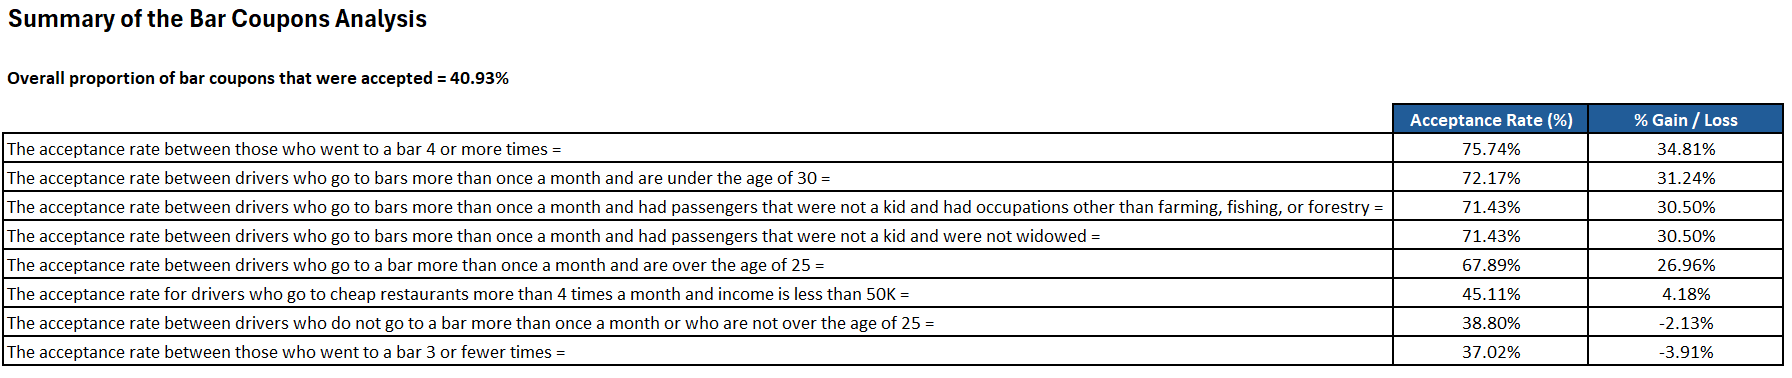

#### Hypotheses about drivers who accepted the bar coupons

There is a **positive association** between ...
- ... frequency of bar patronization and `Bar` coupon acceptance rate.
- ... being older than 25 and younger than 30 and `Bar`coupon acceptance rate.
- ... having passengers that are not kids and `Bar`coupon acceptance rate.
- ... not being widowed and `Bar`coupon acceptance rate.
- ... going to cheap restaurants along with having an income less than $50,000 and `Bar`coupon acceptance rate.

Therefore, these are some of the features that should be used to target prospective `Bar`customers when delivering coupons to a prospective customer's cell phone.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

### Investigating the Expensive Restaurant Coupons (Restaurant(20-50) Coupons)

<div class="alert alert-block alert-info">

<b>1. Create a new `DataFrame` that contains just the expensive restaurant coupons.</b>

</div>

In [163]:
data['coupon'].value_counts()

coupon
Coffee House             3968
Restaurant(<20)          2770
Carry out & Take away    2343
Bar                      2001
Restaurant(20-50)        1486
Name: count, dtype: int64

In [164]:
df_ExpRest_coupons = data.loc[data['coupon'] == 'Restaurant(20-50)']
df_ExpRest_coupons.head(3)
df_ExpRest_coupons.shape

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
14,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,gt8,4~8,1~3,1,1,0,0,1,1
18,Work,Alone,Sunny,80,7AM,Restaurant(20-50),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,4~8,4~8,1~3,1,1,0,0,1,1
36,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,1,0,0,1,0


(1486, 25)

<div class="alert alert-block alert-info">
<b>2. What proportion of expensive restaurant coupons were accepted?</b>
</div>

#### Overall proportion of expensive restaurant coupons that were accepted

In [165]:
# first calculation

df_ExpRest_coupons['Y'].value_counts(normalize=True)

Y
0    0.559219
1    0.440781
Name: proportion, dtype: float64

In [166]:
# second calculation
value_to_count = 1

# Calculate the percentage
percentage = (df_ExpRest_coupons['Y'].eq(value_to_count).sum() / len(df_ExpRest_coupons)) * 100
formatted_value = f"{percentage:.2f}%"

print(f"The overall proportion of expensive restaurant coupons that were accepted = {formatted_value}.")

The overall proportion of expensive restaurant coupons that were accepted = 44.08%.


<div class="alert alert-block alert-info">
<b>3. Look for important associations and relationships</b>
</div>

In [167]:
columns = ['destination', 'passenger', 'weather', 'temperature', 'time', 'expiration', 'gender', 'age', 'maritalStatus', 
          'has_children', 'education', 'occupation', 'income', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
          'direction_same', 'direction_opp']

for var in columns:
    df_ExpRest_coupons[var].value_counts()

destination
Home               652
Work               427
No Urgent Place    407
Name: count, dtype: int64

passenger
Alone        1006
Kid(s)        173
Friend(s)     168
Partner       139
Name: count, dtype: int64

weather
Sunny    1244
Snowy     177
Rainy      65
Name: count, dtype: int64

temperature
80    848
55    368
30    270
Name: count, dtype: int64

time
7AM     427
6PM     388
10PM    380
2PM     181
10AM    110
Name: count, dtype: int64

expiration
1d    951
2h    535
Name: count, dtype: int64

gender
Female    752
Male      734
Name: count, dtype: int64

age
21         298
26         289
31         233
50plus     222
36         166
41         133
46          82
below21     63
Name: count, dtype: int64

maritalStatus
Married partner      610
Single               569
Unmarried partner    228
Divorced              62
Widowed               17
Name: count, dtype: int64

has_children
0    836
1    650
Name: count, dtype: int64

education
Bachelors degree                          517
Some college - no degree                  496
Graduate degree (Masters or Doctorate)    202
Associates degree                         155
High School Graduate                      104
Some High School                           12
Name: count, dtype: int64

occupation
Unemployed                                   232
Student                                      176
Computer & Mathematical                      166
Sales & Related                              120
Education&Training&Library                   106
Management                                    86
Business & Financial                          78
Office & Administrative Support               78
Arts Design Entertainment Sports & Media      69
Retired                                       55
Food Preparation & Serving Related            35
Healthcare Practitioners & Technical          33
Healthcare Support                            32
Legal                                         26
Community & Social Services                   26
Transportation & Material Moving              23
Personal Care & Service                       22
Construction & Extraction                     21
Protective Service                            21
Installation Maintenance & Repair             20
Life Phys

income
$25000 - $37499     227
$37500 - $49999     211
$100000 or More     207
$12500 - $24999     205
$50000 - $62499     200
Less than $12500    125
$75000 - $87499     109
$87500 - $99999     106
$62500 - $74999      96
Name: count, dtype: int64

toCoupon_GEQ5min
1    1486
Name: count, dtype: int64

toCoupon_GEQ15min
1    943
0    543
Name: count, dtype: int64

toCoupon_GEQ25min
0    1372
1     114
Name: count, dtype: int64

direction_same
0    1229
1     257
Name: count, dtype: int64

direction_opp
1    1229
0     257
Name: count, dtype: int64

#### destination

<div class="alert alert-block alert-info">
<b>a. Compare the acceptance rate between those who have no urgent place they are going and those who are going home or going to work.</b>
</div>

In [168]:
df_Inv_a1 = (df_ExpRest_coupons[
    df_ExpRest_coupons['destination'] == 'No Urgent Place'])
df_Inv_a1.shape

value_to_count = 1

# Calculate the percentage
percentage = (df_Inv_a1['Y'].eq(value_to_count).sum() / len(df_Inv_a1)) * 100
formatted_value = f"{percentage:.2f}%"

print(f"The acceptance rate for drivers who go to expensive restaurants who have no urgent place they are going is " \
      f"{formatted_value}.")

(407, 25)

The acceptance rate for drivers who go to expensive restaurants who have no urgent place they are going is 49.88%.


In [169]:
df_Inv_a2 = df_ExpRest_coupons[
    ((df_ExpRest_coupons['destination'] == 'Home') | 
     (df_ExpRest_coupons['destination'] == 'Work'))]
df_Inv_a2.shape

value_to_count = 1

# Calculate the percentage
percentage = (df_Inv_a2['Y'].eq(value_to_count).sum() / len(df_Inv_a2)) * 100
formatted_value = f"{percentage:.2f}%"

print(f"The acceptance rate for drivers who go to expensive restaurants who are going home or going to work is " \
      f"{formatted_value}.")

(1079, 25)

The acceptance rate for drivers who go to expensive restaurants who are going home or going to work is 41.89%.


#### passengers

<div class="alert alert-block alert-info">
<b>b. Compare the acceptance rate between those who had passengers that were not a kid and those who didn't.</b>
</div>

In [170]:
df_Inv_b1 = df_ExpRest_coupons[
    ((df_ExpRest_coupons['passenger'] == 'Friend(s)') | (df_ExpRest_coupons['passenger'] == 'Partner'))
]

df_Inv_b1.shape

value_to_count = 1

# Calculate the percentage
percentage = (df_Inv_b1['Y'].eq(value_to_count).sum() / len(df_Inv_b1)) * 100
formatted_value = f"{percentage:.2f}%"

print(f"The acceptance rate for drivers who go to expensive restaurants who had non-kid passengers is " \
      f"{formatted_value}.")

(307, 25)

The acceptance rate for drivers who go to expensive restaurants who had non-kid passengers is 53.75%.


In [171]:
df_Inv_b2 = df_ExpRest_coupons[
    ((df_ExpRest_coupons['passenger'] != 'Friend(s)') & (df_ExpRest_coupons['passenger'] != 'Partner'))
]

df_Inv_b2.shape

value_to_count = 1

# Calculate the percentage
percentage = (df_Inv_b2['Y'].eq(value_to_count).sum() / len(df_Inv_b2)) * 100
formatted_value = f"{percentage:.2f}%"

print(f"The acceptance rate for drivers who go to expensive restaurants who did not have non-kid passengers is " \
      f"{formatted_value}.")

(1179, 25)

The acceptance rate for drivers who go to expensive restaurants who did not have non-kid passengers is 41.56%.


#### weather

<div class="alert alert-block alert-info">
<b>c. Compare the acceptance rate on days that were sunny and days that weren't.</b>
</div>

In [172]:
df_Inv_c1 = (df_ExpRest_coupons[
    df_ExpRest_coupons['weather'] == 'Sunny'])
df_Inv_c1.shape

value_to_count = 1

# Calculate the percentage
percentage = (df_Inv_c1['Y'].eq(value_to_count).sum() / len(df_Inv_c1)) * 100
formatted_value = f"{percentage:.2f}%"

print(f"The acceptance rate for drivers who go to expensive restaurants on days that were sunny is " \
      f"{formatted_value}.")

(1244, 25)

The acceptance rate for drivers who go to expensive restaurants on days that were sunny is 46.30%.


In [173]:
df_Inv_c2 = df_ExpRest_coupons[
    ((df_ExpRest_coupons['weather'] == 'Snowy') | (df_ExpRest_coupons['weather'] == 'Rainy'))
]

df_Inv_c2.shape

value_to_count = 1

# Calculate the percentage
percentage = (df_Inv_c2['Y'].eq(value_to_count).sum() / len(df_Inv_c2)) * 100
formatted_value = f"{percentage:.2f}%"

print(f"The acceptance rate for drivers who go to expensive restaurants on days that are snowy or rainy " \
      f"{formatted_value}.")

(242, 25)

The acceptance rate for drivers who go to expensive restaurants on days that are snowy or rainy 32.64%.


#### temperature

<div class="alert alert-block alert-info">
<b>d. Compare the acceptance rate on days where the temperature was 80 or above and those days where the temperature was below 80.</b>
</div>

In [174]:
df_Inv_d1 = (df_ExpRest_coupons[
    df_ExpRest_coupons['temperature'] == 80])
df_Inv_d1.shape

value_to_count = 1

# Calculate the percentage
percentage = (df_Inv_d1['Y'].eq(value_to_count).sum() / len(df_Inv_d1)) * 100
formatted_value = f"{percentage:.2f}%"

print(f"The acceptance rate for drivers who go to expensive restaurants on days when the temperature is 80 or above is " \
      f"{formatted_value}.")

(848, 25)

The acceptance rate for drivers who go to expensive restaurants on days when the temperature is 80 or above is 48.00%.


In [175]:
df_Inv_d2 = df_ExpRest_coupons[
    ((df_ExpRest_coupons['temperature'] == 55) | (df_ExpRest_coupons['temperature'] == 30))
]

df_Inv_d2.shape

value_to_count = 1

# Calculate the percentage
percentage = (df_Inv_d2['Y'].eq(value_to_count).sum() / len(df_Inv_d2)) * 100
formatted_value = f"{percentage:.2f}%"

print(f"The acceptance rate for drivers who go to expensive restaurants on days when the temperature is below 80 is " \
      f"{formatted_value}.")

(638, 25)

The acceptance rate for drivers who go to expensive restaurants on days when the temperature is below 80 is 38.87%.


#### time

<div class="alert alert-block alert-info">
<b>e. Compare the acceptance rate on days when the time was in the evening or days when the time wan't in the evening.</b>
</div>

In [176]:
df_Inv_e1 = df_ExpRest_coupons[
    ((df_ExpRest_coupons['time'] == '6PM') | (df_ExpRest_coupons['time'] == '10PM'))
]

df_Inv_e1.shape

value_to_count = 1

# Calculate the percentage
percentage = (df_Inv_e1['Y'].eq(value_to_count).sum() / len(df_Inv_e1)) * 100
formatted_value = f"{percentage:.2f}%"

print(f"The acceptance rate on days when the time was in the evening is " \
      f"{formatted_value}.")

(768, 25)

The acceptance rate on days when the time was in the evening is 41.67%.


In [177]:
df_Inv_e2 = df_ExpRest_coupons[
    ((df_ExpRest_coupons['time'] == '7AM') | (df_ExpRest_coupons['time'] == '10AM') | (df_ExpRest_coupons['time'] == '2PM'))
]

df_Inv_e2.shape

value_to_count = 1

# Calculate the percentage
percentage = (df_Inv_e2['Y'].eq(value_to_count).sum() / len(df_Inv_e2)) * 100
formatted_value = f"{percentage:.2f}%"

print(f"The acceptance rate on days when the time was not in the evening is " \
      f"{formatted_value}.")

(718, 25)

The acceptance rate on days when the time was not in the evening is 46.66%.


#### expiration

<div class="alert alert-block alert-info">
<b>f. Compare the acceptance rate when the expiration date was 1 day to when the expiration date was 2 hours.</b>
</div>

In [178]:
df_Inv_f1 = df_ExpRest_coupons[df_ExpRest_coupons['expiration'] == '1d']
df_Inv_f1.shape

value_to_count = 1

# Calculate the percentage based on the subset where the condition is satisfied
percentage = (df_Inv_f1['Y'].eq(value_to_count).sum() / len(df_Inv_f1['Y'])) * 100
formatted_value = f"{percentage:.2f}%"

print(f"The acceptance rate for drivers who go to expensive restaurants when the coupon's expiration date is 1 day is " \
      f"{formatted_value}.")

(951, 25)

The acceptance rate for drivers who go to expensive restaurants when the coupon's expiration date is 1 day is 52.05%.


In [179]:
df_Inv_f2= df_ExpRest_coupons[df_ExpRest_coupons['expiration'] == '2h']
df_Inv_f2.shape

value_to_count = 1

# Calculate the percentage based on the subset where the condition is satisfied
percentage = (df_Inv_f2['Y'].eq(value_to_count).sum() / len(df_Inv_f2['Y'])) * 100
formatted_value = f"{percentage:.2f}%"

print(f"The acceptance rate for drivers who go to expensive restaurants when the coupon's expiration date is 2 hours is " \
      f"{formatted_value}.")

(535, 25)

The acceptance rate for drivers who go to expensive restaurants when the coupon's expiration date is 2 hours is 29.91%.


#### gender

<div class="alert alert-block alert-info">
<b>g. Compare the acceptance rate when the gender of the coupon recipient is female.</b>
</div>

In [180]:
df_Inv_g1 = df_ExpRest_coupons[df_ExpRest_coupons['gender'] == 'Female']
df_Inv_g1.shape

value_to_count = 1

# Calculate the percentage based on the subset where the condition is satisfied
percentage = (df_Inv_g1['Y'].eq(value_to_count).sum() / len(df_Inv_g1['Y'])) * 100
formatted_value = f"{percentage:.2f}%"

print(f"The acceptance rate for drivers who go to expensive restaurants when the gender of the driver is female is " \
      f"{formatted_value}.")

(752, 25)

The acceptance rate for drivers who go to expensive restaurants when the gender of the driver is female is 42.82%.


In [181]:
df_Inv_g2 = df_ExpRest_coupons[df_ExpRest_coupons['gender'] == 'Male']
df_Inv_g2.shape

value_to_count = 1

# Calculate the percentage based on the subset where the condition is satisfied
percentage = (df_Inv_g2['Y'].eq(value_to_count).sum() / len(df_Inv_g2['Y'])) * 100
formatted_value = f"{percentage:.2f}%"

print(f"The acceptance rate for drivers who go to expensive restaurants when the gender of the driver is male is " \
      f"{formatted_value}.")

(734, 25)

The acceptance rate for drivers who go to expensive restaurants when the gender of the driver is male is 45.37%.


#### age

<div class="alert alert-block alert-info">
<b>h. Compare the acceptance rate for drivers who go to expensive restaurants when the driver's age is under 30.</b>
</div>

In [182]:
df_Inv_h1 = df_ExpRest_coupons[
    ((df_ExpRest_coupons['age'] == 'below21') | (df_ExpRest_coupons['age'] == '21') | (df_ExpRest_coupons['age'] == '26'))
]

df_Inv_h1.shape

value_to_count = 1

# Calculate the percentage
percentage = (df_Inv_h1['Y'].eq(value_to_count).sum() / len(df_Inv_h1)) * 100
formatted_value = f"{percentage:.2f}%"

print(f"The acceptance rate for drivers who go to expensive restaurants when the drivers's age is under 30 is " \
      f"{formatted_value}.")

(650, 25)

The acceptance rate for drivers who go to expensive restaurants when the drivers's age is under 30 is 46.15%.


In [183]:
df_Inv_h2 = df_ExpRest_coupons[
    ((df_ExpRest_coupons['age'] != 'below21') & (df_ExpRest_coupons['age'] != '21') & (df_ExpRest_coupons['age'] != '26'))
]

df_Inv_h2.shape

value_to_count = 1

# Calculate the percentage
percentage = (df_Inv_h2['Y'].eq(value_to_count).sum() / len(df_Inv_h2)) * 100
formatted_value = f"{percentage:.2f}%"

print(f"The acceptance rate for drivers who go to expensive restaurants when the drivers's age is over 30 is " \
      f"{formatted_value}.")

(836, 25)

The acceptance rate for drivers who go to expensive restaurants when the drivers's age is over 30 is 42.46%.


#### maritalStatus

<div class="alert alert-block alert-info">
<b>i. Compare the acceptance rate for drivers who go to expensive restaurants when the driver has a partner that they are married to, to those drivers who don't have a partner that they are married to.</b>
</div>

In [184]:
df_Inv_i1 = df_ExpRest_coupons[df_ExpRest_coupons['maritalStatus'] == 'Married partner']
df_Inv_i1.shape

value_to_count = 1

# Calculate the percentage based on the subset where the condition is satisfied
percentage = (df_Inv_i1['Y'].eq(value_to_count).sum() / len(df_Inv_i1['Y'])) * 100
formatted_value = f"{percentage:.2f}%"

print(f"The acceptance rate for drivers who go to expensive restaurants when the driver has a partner that they are " \
      f"married to is {formatted_value}.")

(610, 25)

The acceptance rate for drivers who go to expensive restaurants when the driver has a partner that they are married to is 41.80%.


In [185]:
df_Inv_i2 = df_ExpRest_coupons[df_ExpRest_coupons['maritalStatus'] != 'Married partner']
df_Inv_i2.shape

value_to_count = 1

# Calculate the percentage based on the subset where the condition is satisfied
percentage = (df_Inv_i2['Y'].eq(value_to_count).sum() / len(df_Inv_i2['Y'])) * 100
formatted_value = f"{percentage:.2f}%"

print(f"The acceptance rate for drivers who go to expensive restaurants when the driver does not have a partner that they " \
      f"are married to is {formatted_value}.")

(876, 25)

The acceptance rate for drivers who go to expensive restaurants when the driver does not have a partner that they are married to is 45.66%.


#### has_children

<div class="alert alert-block alert-info">
<b>j. Compare the acceptance rate for drivers who go to expensive restaurants who have children to those drivers who don't have children.</b>
</div>

In [186]:
df_Inv_j1 = df_ExpRest_coupons[df_ExpRest_coupons['has_children'] == 1]
df_Inv_j1.shape

value_to_count = 1

# Calculate the percentage based on the subset where the condition is satisfied
percentage = (df_Inv_j1['Y'].eq(value_to_count).sum() / len(df_Inv_j1['Y'])) * 100
formatted_value = f"{percentage:.2f}%"

print(f"The acceptance rate for drivers with children who go to expensive restaurants is {formatted_value}.")

(650, 25)

The acceptance rate for drivers with children who go to expensive restaurants is 40.77%.


In [187]:
df_Inv_j2 = df_ExpRest_coupons[df_ExpRest_coupons['has_children'] == 0]
df_Inv_j2.shape

value_to_count = 1

# Calculate the percentage based on the subset where the condition is satisfied
percentage = (df_Inv_j2['Y'].eq(value_to_count).sum() / len(df_Inv_j2['Y'])) * 100
formatted_value = f"{percentage:.2f}%"

print(f"The acceptance rate for drivers that don't have children who go to expensive restaurants is {formatted_value}.")

(836, 25)

The acceptance rate for drivers that don't have children who go to expensive restaurants is 46.65%.


#### education

<div class="alert alert-block alert-info">
<b>k. Compare the acceptance rate for drivers who go to expensive restaurants that have Graduate degrees to those that don't.</b>
</div>

In [188]:
df_Inv_k1 = df_ExpRest_coupons[df_ExpRest_coupons['education'] == 'Graduate degree (Masters or Doctorate)']
df_Inv_k1.shape

value_to_count = 1

# Calculate the percentage based on the subset where the condition is satisfied
percentage = (df_Inv_k1['Y'].eq(value_to_count).sum() / len(df_Inv_k1['Y'])) * 100
formatted_value = f"{percentage:.2f}%"

print(f"The acceptance rate for drivers that have Graduate degrees who go to expensive restaurants is {formatted_value}.")

(202, 25)

The acceptance rate for drivers that have Graduate degrees who go to expensive restaurants is 38.12%.


In [189]:
df_Inv_k2 = df_ExpRest_coupons[df_ExpRest_coupons['education'] != 'Graduate degree (Masters or Doctorate)']
df_Inv_k2.shape

value_to_count = 1

# Calculate the percentage based on the subset where the condition is satisfied
percentage = (df_Inv_k2['Y'].eq(value_to_count).sum() / len(df_Inv_k2['Y'])) * 100
formatted_value = f"{percentage:.2f}%"

print(f"The acceptance rate for drivers that do not have Graduate degrees who go to expensive restaurants " \
    f"is {formatted_value}.")

(1284, 25)

The acceptance rate for drivers that do not have Graduate degrees who go to expensive restaurants is 45.02%.


#### income

<div class="alert alert-block alert-info">
<b>l. Compare the acceptance rate for drivers who go to expensive restaurants whose income is less than 50 K to those frivers whose income is not less than 50K.</b>
</div>

In [190]:
df_Inv_l1 = df_ExpRest_coupons[
    ((df_ExpRest_coupons['income'] == '$25000 - $37499') | (df_ExpRest_coupons['income'] == '$12500 - $24999') | 
     (df_ExpRest_coupons['income'] == '$37500 - $49999') | (df_ExpRest_coupons['income'] == 'Less than $12500'))
]

df_Inv_l1.shape

value_to_count = 1

# Calculate the percentage
percentage = (df_Inv_l1['Y'].eq(value_to_count).sum() / len(df_Inv_l1)) * 100
formatted_value = f"{percentage:.2f}%"

print(f"The acceptance rate for drivers with incomes under 50K who go to expensive restaurants is " \
      f"{formatted_value}.")

(768, 25)

The acceptance rate for drivers with incomes under 50K who go to expensive restaurants is 43.10%.


In [191]:
df_Inv_l2 = df_ExpRest_coupons[
    ((df_ExpRest_coupons['income'] != '$25000 - $37499') & (df_ExpRest_coupons['income'] != '$12500 - $24999') & 
     (df_ExpRest_coupons['income'] != '$37500 - $49999') & (df_ExpRest_coupons['income'] != 'Less than $12500'))
]

df_Inv_l2.shape

value_to_count = 1

# Calculate the percentage
percentage = (df_Inv_l2['Y'].eq(value_to_count).sum() / len(df_Inv_l2)) * 100
formatted_value = f"{percentage:.2f}%"

print(f"The acceptance rate for drivers with incomes over 50K who go to expensive restaurants is " \
      f"{formatted_value}.")

(718, 25)

The acceptance rate for drivers with incomes over 50K who go to expensive restaurants is 45.13%.


### Analysis of Expensive Restaurant Coupons -- Summary Tables

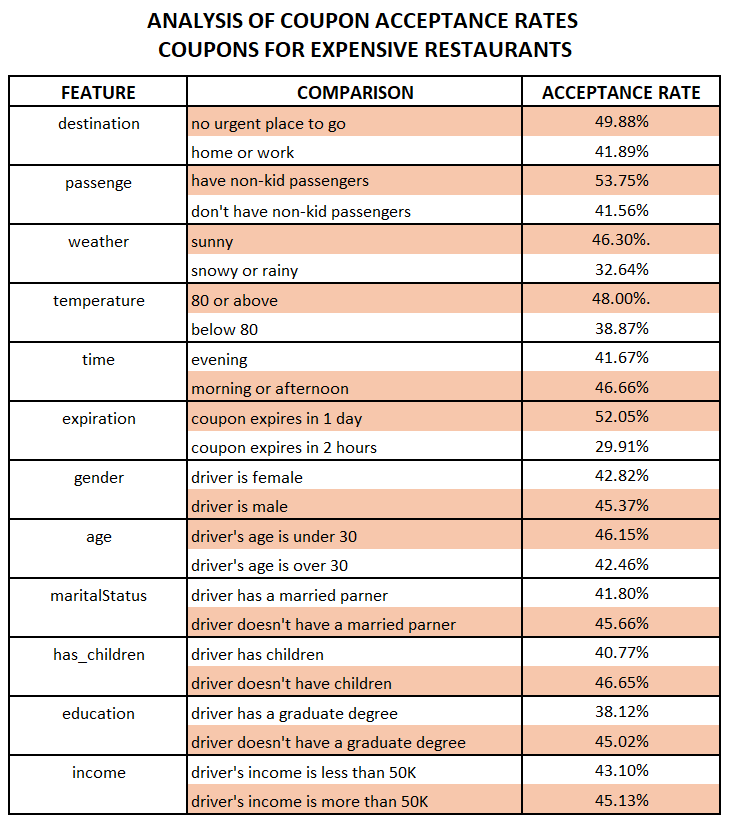

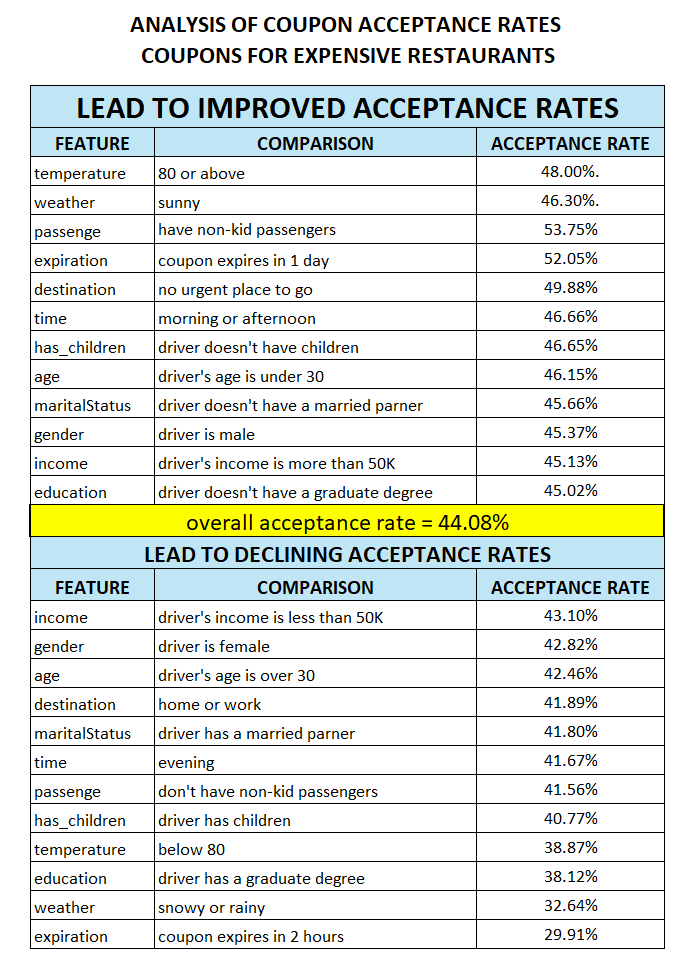

There is a **positive association** between ...
- ... high temperatures (80 and over) and `Restaurant20To50` coupon acceptance rate.
- ... sunny weather and `Restaurant20To50`coupon acceptance rate.
- ... having non-kid passengers and `Restaurant20To50`coupon acceptance rate.
- ... not a "no urgent place to go" destination and `Restaurant20To50`coupon acceptance rate.
- ... receiving the coupon in the morning or afternoon and `Restaurant20To50`coupon acceptance rate.
- ... having children and `Restaurant20To50`coupon acceptance rate.
- ... being under the age of 30 and `Restaurant20To50`coupon acceptance rate.
- ... not having a married partner and `Restaurant20To50`coupon acceptance rate.
- ... being male and `Restaurant20To50`coupon acceptance rate.
- ... having an income over 50 K and `Restaurant20To50`coupon acceptance rate.
- ... not having a graduate degree and `Restaurant20To50`coupon acceptance rate.

Therefore, these are some of the features that should be used to target prospective `Restaurant20To50`customers when delivering coupons to a prospective customer's cell phone.